In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# ==========================================================
# KAGGLE ML EXAM – MULTICLASS CLASSIFICATION (PROBABILITY OUTPUT)
# Metric: LOG LOSS | Submission: One column per class
# ==========================================================

# =====================
# 1. IMPORT LIBRARIES
# =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, classification_report

import warnings
warnings.filterwarnings('ignore')

# =====================
# 2. LOAD DATA
# =====================
train_df = pd.read_csv('/kaggle/input/mock-test-2-mse-2/train.csv')
test_df  = pd.read_csv('/kaggle/input/mock-test-2-mse-2/test.csv')

TARGET_COL = 'Status'   # CHANGE IF REQUIRED

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         15000 non-null  float64
 1   Drug           15000 non-null  float64
 2   Age            15000 non-null  float64
 3   Sex            15000 non-null  float64
 4   Ascites        15000 non-null  float64
 5   Hepatomegaly   15000 non-null  float64
 6   Spiders        15000 non-null  float64
 7   Edema          15000 non-null  float64
 8   Bilirubin      15000 non-null  float64
 9   Cholesterol    15000 non-null  float64
 10  Albumin        15000 non-null  float64
 11  Copper         15000 non-null  float64
 12  Alk_Phos       15000 non-null  float64
 13  SGOT           15000 non-null  float64
 14  Tryglicerides  15000 non-null  float64
 15  Platelets      15000 non-null  float64
 16  Prothrombin    15000 non-null  float64
 17  Stage          15000 non-null  float64
 18  Status

None

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
count,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1957.65580,1.824667,19340.767667,0.039200,0.898533,1.135267,1.427467,0.102867,1.869133,300.938867,3.523682,64.479867,1413.539373,102.394111,104.259200,253.411333,10.624440,3.037200,0.626733
std,1346.32124,1.275996,3731.980408,0.194077,0.981446,0.847870,1.418053,0.373846,2.716933,117.030281,0.368956,55.281565,1437.296372,41.735230,33.722925,90.988027,0.728116,0.877497,0.914327
min,28.00000,0.000000,1223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,44.000000,1.960000,2.000000,140.000000,26.350000,4.000000,2.000000,9.000000,1.000000,0.000000
25%,1095.00000,0.000000,16714.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,280.000000,3.290000,50.000000,1009.000000,91.000000,99.000000,190.000000,10.100000,2.000000,0.000000
50%,1770.00000,2.000000,19698.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.900000,280.000000,3.580000,52.000000,1080.000000,97.650000,99.000000,249.000000,10.600000,3.000000,0.000000
75%,2609.00000,3.000000,22388.000000,0.000000,2.000000,2.000000,3.000000,0.000000,1.800000,280.000000,3.770000,58.000000,1142.000000,104.490000,99.000000,311.000000,11.000000,4.000000,2.000000
max,25569.00000,3.000000,127321.000000,1.000000,2.000000,2.000000,3.000000,2.000000,28.000000,2580.000000,4.640000,674.000000,20392.000000,2656.700000,598.000000,824.000000,18.000000,4.000000,2.000000


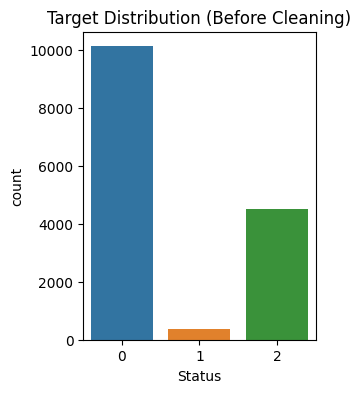

In [18]:
# =====================
# 3. EDA (BEFORE CLEANING)
# =====================
display(train_df.info())
display(train_df.describe())

plt.figure(figsize=(3,4))
sns.countplot(x=train_df[TARGET_COL])
plt.title('Target Distribution (Before Cleaning)')
plt.show()

In [21]:
# =====================
# 4. HANDLE ID COLUMN
# =====================
if 'id' in train_df.columns:
    train_df = train_df.drop('id', axis=1)

if 'id' in test_df.columns:
    test_ids = test_df['id']
    test_df = test_df.drop('id', axis=1)
else:
    test_ids = test_df.index

In [23]:
# =====================
# 5. ENCODE CATEGORICAL FEATURES (SAFE & FINAL)
# =====================
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Select categorical columns EXCEPT target (safe way)
cat_cols = [
    col for col in train_df.columns
    if train_df[col].dtype == 'object' and col != TARGET_COL
]

for col in cat_cols:
    le = LabelEncoder()

    # Fit on BOTH train + test
    combined = pd.concat([train_df[col], test_df[col]], axis=0).astype(str)
    le.fit(combined)

    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col]  = le.transform(test_df[col].astype(str))

    label_encoders[col] = le

# Encode TARGET (TRAIN ONLY)
if train_df[TARGET_COL].dtype == 'object':
    target_encoder = LabelEncoder()
    train_df[TARGET_COL] = target_encoder.fit_transform(train_df[TARGET_COL])


In [24]:
# =====================
# 6. HANDLE MISSING VALUES (ABSOLUTE FINAL)
# =====================

# Step 0: Force numeric conversion
for col in train_df.columns:
    if col != TARGET_COL:
        train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
        test_df[col]  = pd.to_numeric(test_df[col], errors='coerce')

# Step 1: Identify numeric & categorical columns
num_cols = train_df.drop(TARGET_COL, axis=1).select_dtypes(include=np.number).columns
cat_cols = train_df.drop(TARGET_COL, axis=1).select_dtypes(exclude=np.number).columns

# Step 2: Impute numeric columns → MEDIAN
num_imputer = SimpleImputer(strategy='median')
train_df[num_cols] = num_imputer.fit_transform(train_df[num_cols])
test_df[num_cols]  = num_imputer.transform(test_df[num_cols])

# Step 3: Impute categorical columns → MOST FREQUENT (ONLY IF EXISTS)
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])
    test_df[cat_cols]  = cat_imputer.transform(test_df[cat_cols])


In [25]:
# =====================
# 7. TRAIN–VALIDATION SPLIT
# =====================
X = train_df.drop(TARGET_COL, axis=1)
y = train_df[TARGET_COL]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# =====================
# 8. MODEL TRAINING (RANDOM FOREST)
# =====================
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [28]:
# =====================
# 9. VALIDATION USING LOG LOSS
# =====================
val_probs = rf_model.predict_proba(X_val)
print('Validation Log Loss:', log_loss(y_val, val_probs))

# Optional: label-based report (just for understanding)
val_preds = rf_model.predict(X_val)
print(classification_report(y_val, val_preds))

Validation Log Loss: 0.437014811224614
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2023
           1       0.50      0.03      0.05        74
           2       0.81      0.70      0.75       903

    accuracy                           0.84      3000
   macro avg       0.72      0.56      0.57      3000
weighted avg       0.83      0.84      0.83      3000



In [29]:
# =====================
# 10. TEST PREDICTION (PROBABILITIES)
# =====================
test_probs = rf_model.predict_proba(test_df)

# =====================
# 11. CREATE SUBMISSION FILE
# =====================
submission = pd.DataFrame(
    test_probs,
    columns=target_encoder.classes_
)

In [33]:
submission.to_csv('submission.csv', index=False)
print('submission.csv created')


# ==========================================================
# END – MULTICLASS PROBABILITY CLASSIFICATION (EXAM READY)
# ==========================================================

submission.csv created
